
#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2025**

---

# Varias Variables

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

#seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/refs/heads/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),6500000.0,5800000.0,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,45,Hombre Cis,Sí,True,Senior,6500000.0
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000.0,10200000.0,Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.0,Bruto,32,Mujer Cis,Sí,True,Senior,12700000.0
2,2,Córdoba,Full-Time,Staff (planta permanente),3952805.0,3137662.0,Cobro parte del salario en dólares,985,No,No recibo bono,...,NaN,NaN,NaN,NaN,29,Hombre Cis,Sí,True,Semi-Senior,3952805.0


In [3]:
salary_col='salary_monthly_BRUTO'
edad='profile_age'
df= df[df[salary_col] <= 10000000]
df= df[df[edad] <= 100]
print('Máximo',max(df[salary_col]),'Mínimo',min(df[salary_col]))

Máximo 10000000.0 Mínimo 150000.0


# Variables Categóricas


Hay algunas variables que han sido rellenadas con texto, wque hay que interpretar o son inútiles. En el 2022, la variable género tenia varias categorías que podian ser unidas en varon_cis o mujer_cis y diversidades. En el 2023, explotó el trolleo y el resultado es absurdo

In [4]:
df.profile_gender.unique()

array(['Hombre Cis', 'Mujer Cis', 'No binarie', 'Prefiero no decir', nan,
       'Trans', 'Queer', 'Lesbiana', 'Agénero'], dtype=object)

In [6]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [7]:
salary_col='salary_monthly_BRUTO'

filtered_df= df[df[salary_col] < 10000000]
df_H= filtered_df[ filtered_df['profile_g']=='Varón cis']
df_M=filtered_df[ filtered_df['profile_g']=='Mujer cis']

<Figure size 1000x600 with 0 Axes>

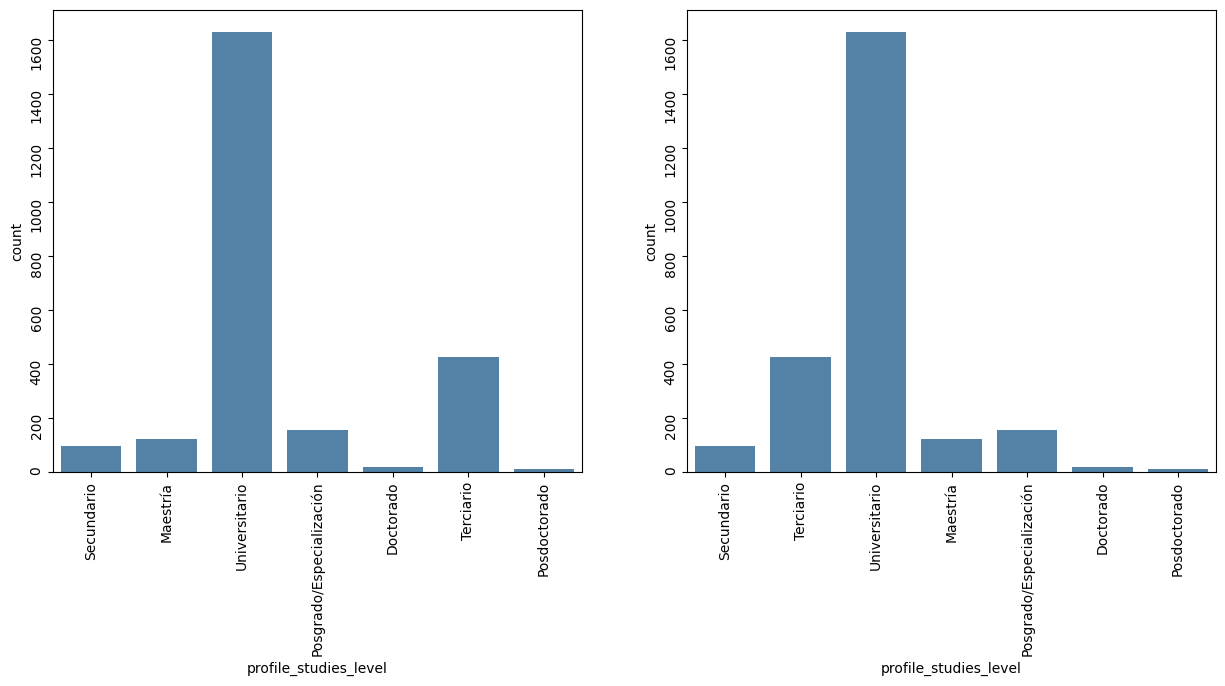

In [8]:
plt.figure(figsize=(10, 6))
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario',
                         'Maestría','Posgrado/Especialización', 'Doctorado', 'Posdoctorado']#lista de los nombres de categorías ordenadas
fig, axes = plt.subplots(ncols=2, figsize=(15,6)) #se genera la figura, se divide en dos lugares y se define su tamaño
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[0]) #gráfico de conteos (en el lugar 0)
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[1], #gráfico de conteos ordenado (en el lugar 1)
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=90) # en cada lugar (ax in axes) se rota la etiqueta

# Variables Numéricas


In [9]:
salary_col='salary_monthly_BRUTO' #defino variable con el nombre de la columna de interés
#salary_col='salary_monthly_NETO'

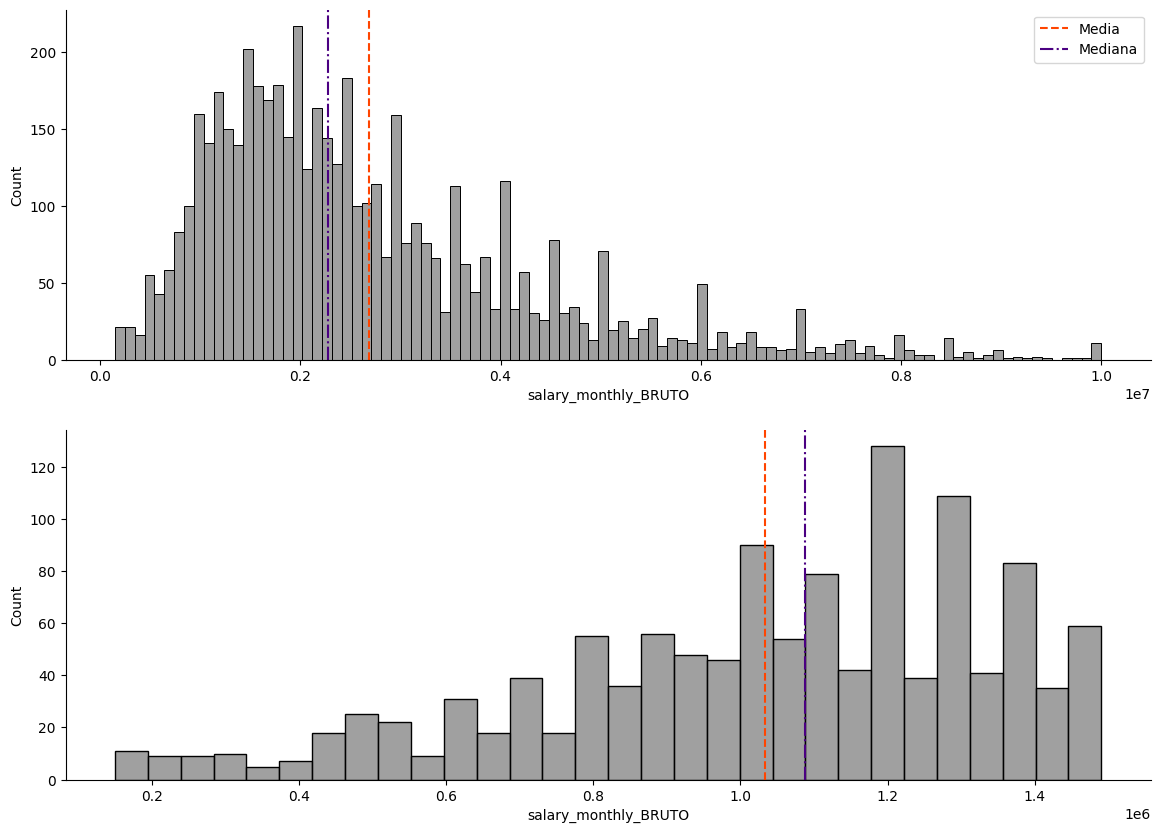

In [10]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 10)) #se genera la figura, se divide en dos lugares y se define su tamaño

seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray') #Histograma con 100 bins
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 1500000]
seaborn.histplot(filtered_df[salary_col], bins=30, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

In [11]:
print(df[salary_col][:4])
print(type(df[salary_col]))

0    6500000.0
2    3952805.0
3    1606000.0
4    1325301.0
Name: salary_monthly_BRUTO, dtype: float64
<class 'pandas.core.series.Series'>


#Varias Variables



## Varias Categóricas

In [12]:
## Tabla de contingencia
pd.crosstab(df.work_province, df.profile_studies_level)#, normalize=True) #no están ordenados
pd.crosstab(df.work_province, df.profile_studies_level)[sorted_studies_levels]#ordenados

profile_studies_level,Secundario,Terciario,Universitario,Maestría,Posgrado/Especialización,Doctorado,Posdoctorado
work_province,,,,,,,
Buenos Aires,24,83,360,18,26,3,4
Catamarca,0,1,2,0,0,0,0
Chaco,0,6,13,1,0,0,0
Chubut,2,3,8,0,0,0,0
Ciudad Autónoma de Buenos Aires,48,203,792,81,84,8,5
Corrientes,1,6,12,1,0,0,0
Córdoba,5,28,169,3,13,4,0
Entre Ríos,3,3,22,1,3,0,0
Jujuy,0,0,9,0,0,0,0


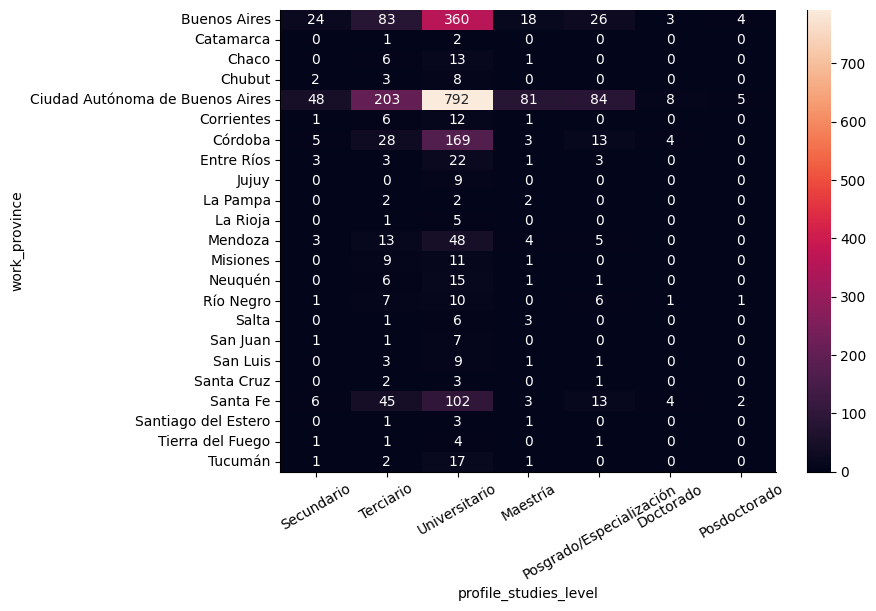

In [13]:
fig = plt.figure(figsize=(8,6))
exp = pd.crosstab(df.work_province,
                  df.profile_studies_level)[sorted_studies_levels]
seaborn.heatmap(exp, annot=True, fmt='g')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
seaborn.despine()

In [14]:
## Tabla de contingencia normalizada, la suma de los valores da 1, son proporciones, estima probabilidad
pd.crosstab(df.profile_age, df.profile_studies_level, normalize=True)[sorted_studies_levels]

profile_studies_level,Secundario,Terciario,Universitario,Maestría,Posgrado/Especialización,Doctorado,Posdoctorado
profile_age,,,,,,,
20,0.000000,0.000407,0.002846,0.000000,0.000000,0.000000,0.000000
21,0.000813,0.000000,0.008537,0.000000,0.000407,0.000000,0.000000
22,0.001220,0.002033,0.011789,0.000000,0.000000,0.000000,0.000000
23,0.000813,0.004472,0.019919,0.000000,0.000000,0.000000,0.000000
24,0.001626,0.004472,0.023577,0.000000,0.000000,0.000000,0.000000
25,0.002033,0.004878,0.022764,0.000000,0.000407,0.000000,0.000000
26,0.002033,0.003659,0.024797,0.001220,0.000407,0.000000,0.000000
27,0.002033,0.008130,0.032520,0.002439,0.000813,0.000000,0.000000
28,0.002846,0.008537,0.041870,0.000813,0.000813,0.000000,0.000000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Secundario'),
  Text(1, 0, 'Terciario'),
  Text(2, 0, 'Universitario'),
  Text(3, 0, 'Maestría'),
  Text(4, 0, 'Posgrado/Especialización'),
  Text(5, 0, 'Doctorado'),
  Text(6, 0, 'Posdoctorado')])

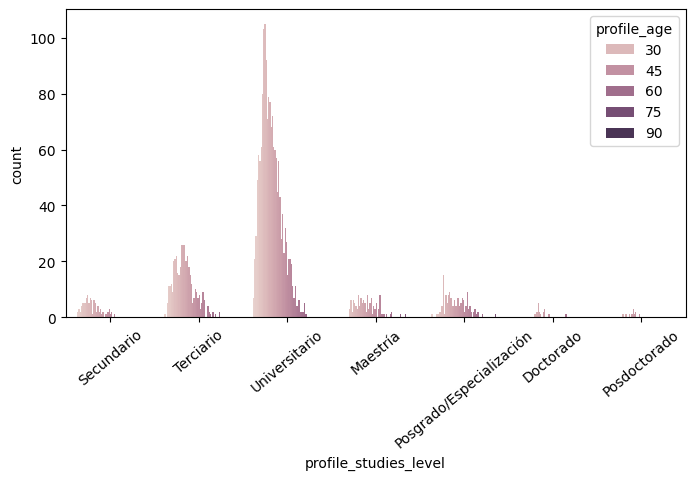

In [15]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(x= df.profile_studies_level,  hue=df.profile_age, order=sorted_studies_levels )
plt.xticks(rotation=40)

## Varias numéricas

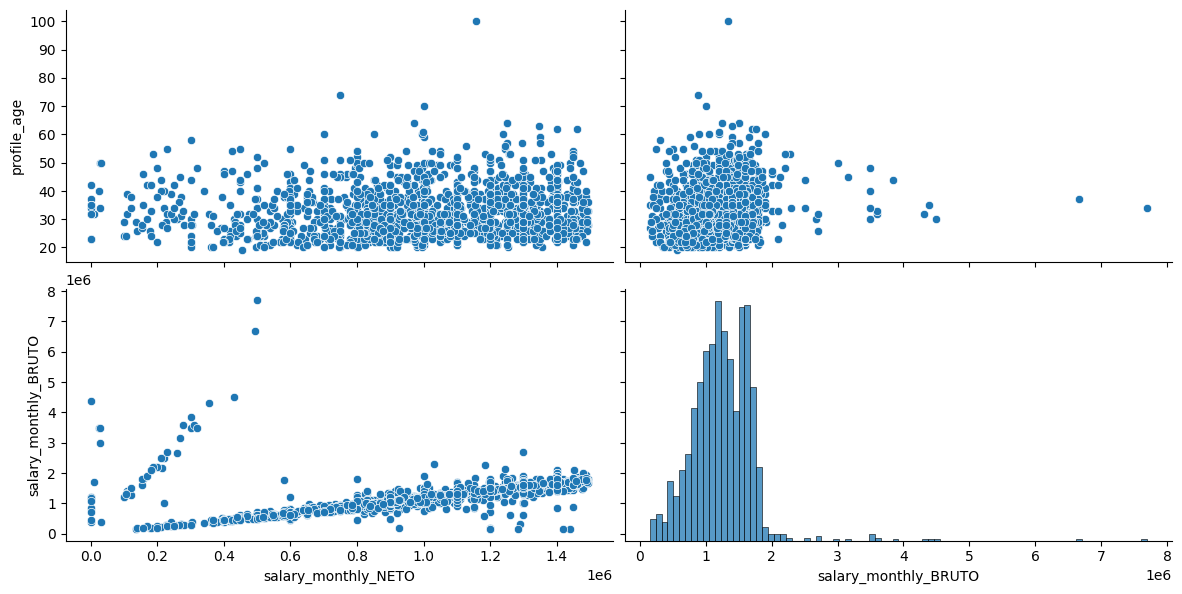

In [16]:
max_sal = 1500000
seaborn.pairplot(data=df[df.salary_monthly_NETO < max_sal],
                 y_vars=['profile_age', 'salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
                 aspect=2, height=3)

<Figure size 800x400 with 0 Axes>

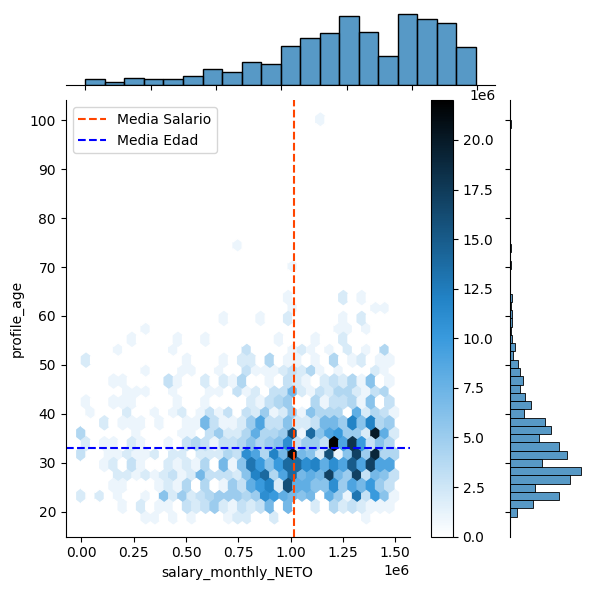

In [17]:
fig = plt.figure(figsize=(8,4))
seaborn.jointplot(data=df[df.salary_monthly_NETO < max_sal], x='salary_monthly_NETO',
                  y='profile_age', kind='hex', height=6)
plt.axvline(df[df.salary_monthly_NETO < max_sal]['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media Salario')
plt.axhline(df[df.salary_monthly_NETO < max_sal]['profile_age'].mean(), color='blue',
            linestyle='--', label='Media Edad')
plt.legend()
plt.colorbar()
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

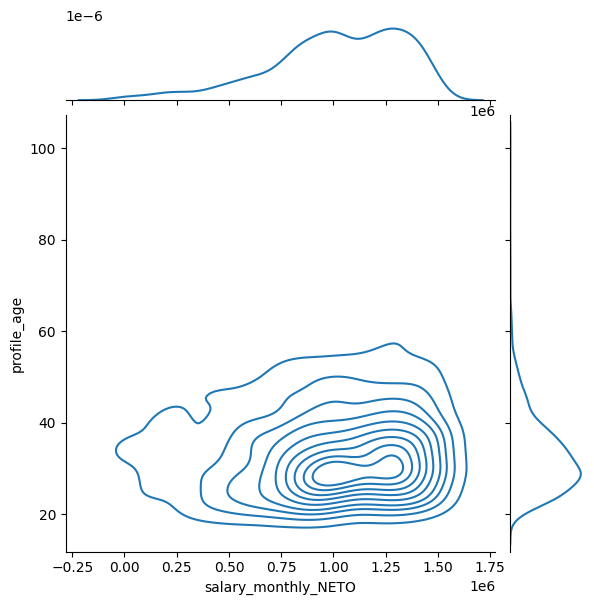

In [18]:
seaborn.jointplot(data=df[df.salary_monthly_NETO < max_sal], x='salary_monthly_NETO',
                  y='profile_age', kind='kde', height=6)
# Remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

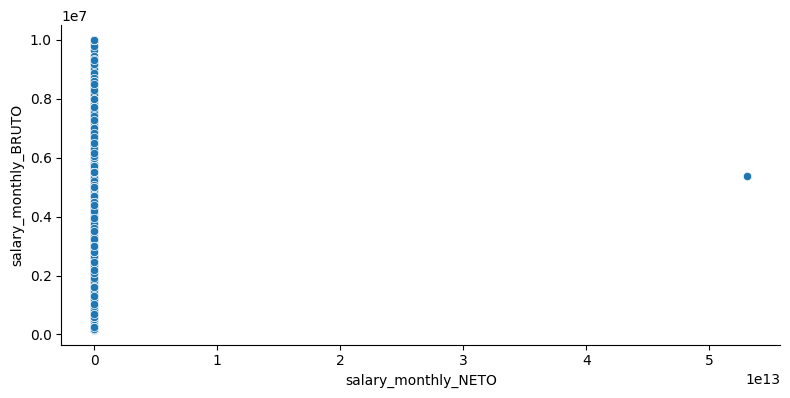

In [19]:
seaborn.pairplot(data=df,
                 y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)

**Pregunta** ¿Cuáles le parece que son las ventajas de ver de a dos  (o más) variables simultáneamente?

## Mixtas

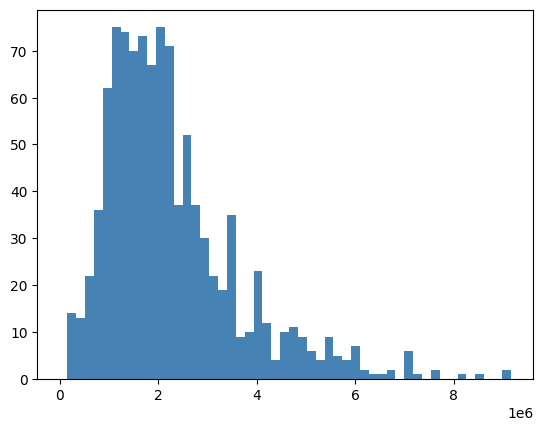

In [20]:
filtered_df= df[df[salary_col] < 10000000] #mirar como cambia filtrando por valores menores...
df_H= filtered_df[ filtered_df['profile_g']=='Varón cis']
df_M=filtered_df[ filtered_df['profile_g']=='Mujer cis']

plt.hist(df_H[salary_col], color='orangered', bins=50)
plt.hist(df_M[salary_col], color='steelblue', bins=50) #aca importa el orden, cuidado con la superposición
plt.show()


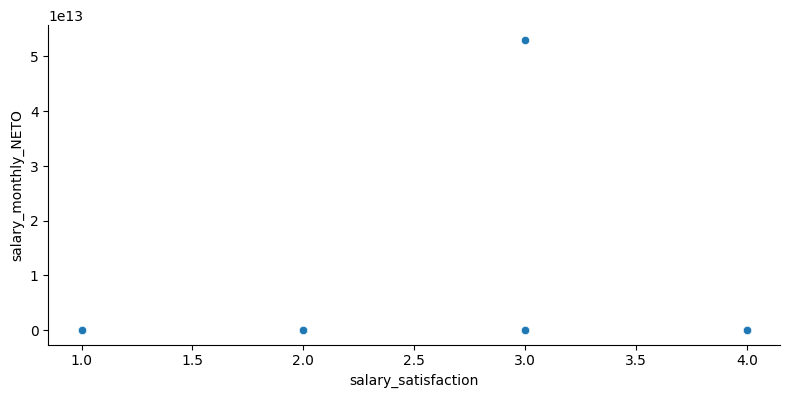

In [21]:
max_age=99
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_satisfaction'],
                 aspect=2, height=4)

Una desventaja de usar un pairplot para variables categóricas es la superposición de los puntos que tienen el mismo valor. Un gráfico que soluciona este problema es el `catplot`

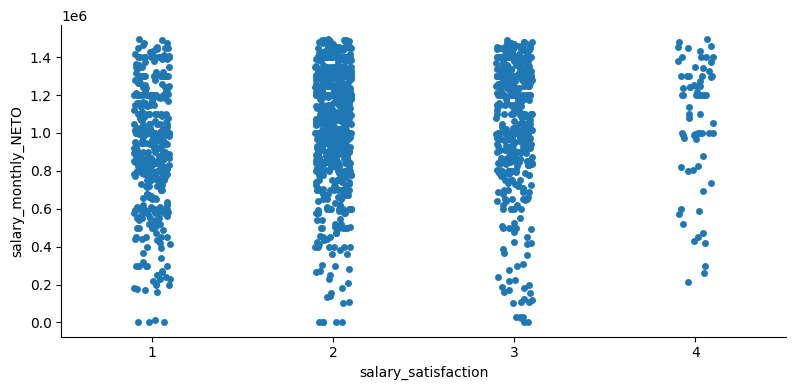

In [22]:
seaborn.catplot(data=df[df.salary_monthly_NETO < max_sal], y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='salary_satisfaction', height=4, aspect=2)

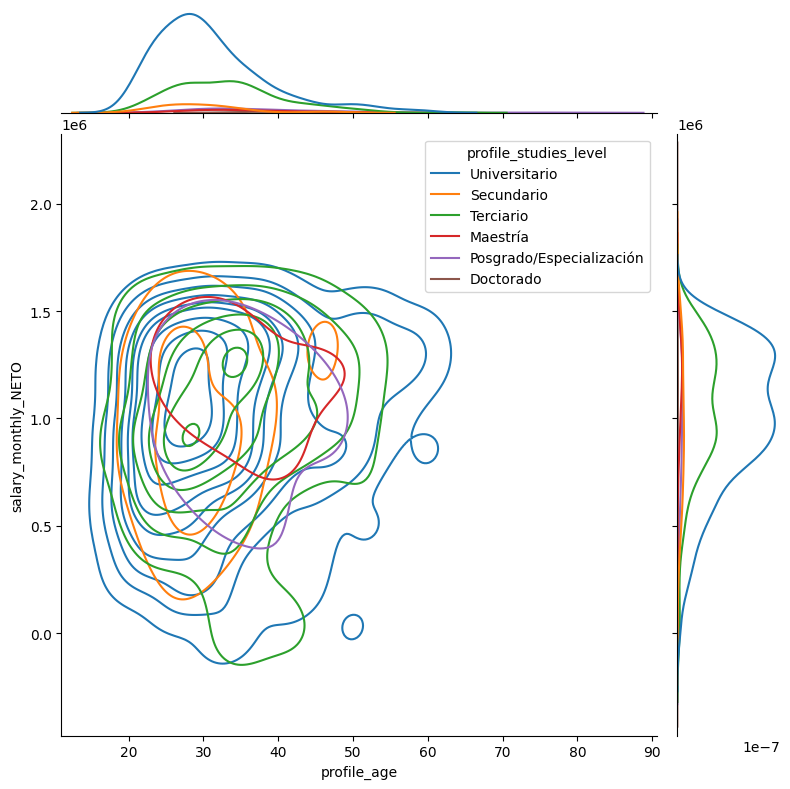

In [23]:
seaborn.jointplot(data=df[df.salary_monthly_NETO < max_sal], x='profile_age',
                  y='salary_monthly_NETO', hue='profile_studies_level',
                  kind='kde', height=8)

Distribucion (con boxplot) condicional

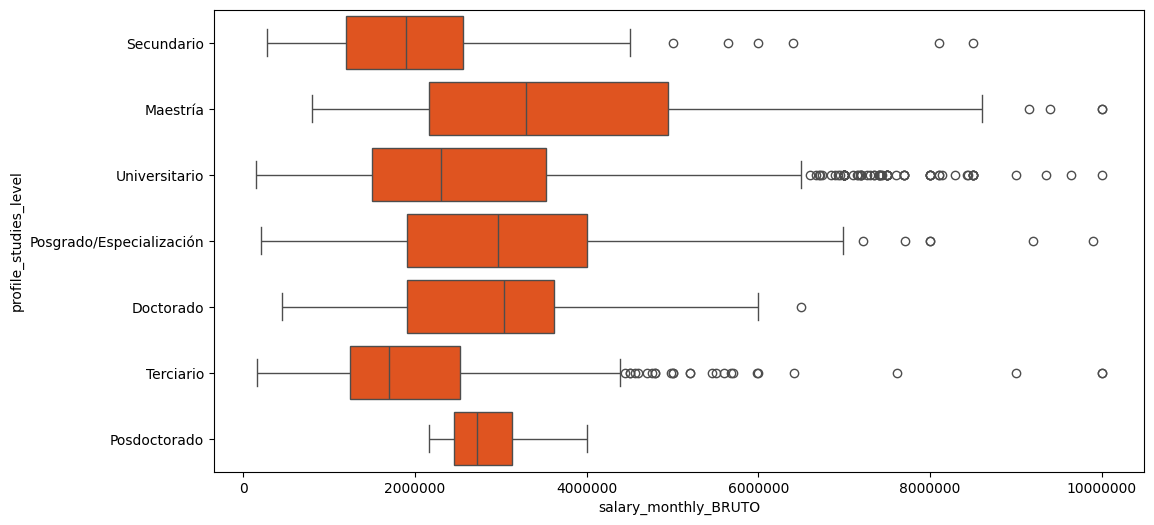

In [24]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

# Práctico para resolver en clase

1. Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario Neto) en conjunto, que comentarios puede hacer al respecto?


(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000.]),
 [Text(-500000.0, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0')])

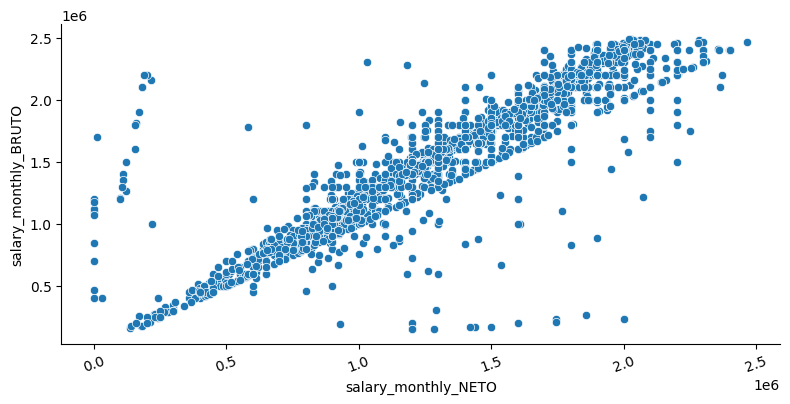

In [26]:
import numpy as np
df_limpio=df[(df.salary_monthly_BRUTO <2500000)& (df.salary_monthly_NETO <2500000)]
seaborn.pairplot(data=df_limpio, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)
plt.xticks(rotation=20)


2. Generamos una nueva columna `'salary_monthly_DESCUENTOS'= 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales.
3. Analice la distribución de esta columna de datos gráficamente.

In [27]:
df_limpio['salary_monthly_DESCUENTOS']=df_limpio.salary_monthly_BRUTO-df_limpio.salary_monthly_NETO #generamos una nueva columna
#print(df_limpio.loc[0:2,'salary_monthly_BRUTO']), print(df_limpio.loc[0:2,'salary_monthly_NETO'])
#print(df_limpio['salary_monthly_DESCUENTOS'][0:2])
df_limpio[0:3] #mire la última columna

<ipython-input-27-d890a48bb410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['salary_monthly_DESCUENTOS']=df_limpio.salary_monthly_BRUTO-df_limpio.salary_monthly_NETO #generamos una nueva columna


,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal,profile_g,salary_monthly_DESCUENTOS
3,3,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),1606000.0,1360000.0,Cobro parte del salario en dólares,1004,No,No recibo bono,...,NaN,NaN,25,Hombre Cis,Sí,True,Semi-Senior,1606000.0,Hombre Cis,246000.0
11,11,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),1212500.0,2071375.0,Mi sueldo está dolarizado (pero cobro en moned...,NaN,No,Performance de la compañía,...,NaN,NaN,28,Hombre Cis,Sí,True,Senior,1212500.0,Hombre Cis,-858875.0
16,16,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,2303066.0,1911545.0,Cobro parte del salario en dólares,990.14,No,No recibo bono,...,0.0,Neto,35,Hombre Cis,Sí,True,Senior,2303066.0,Hombre Cis,391521.0


In [28]:
df_limpio['salary_monthly_DESCUENTOS'].mean()

np.float64(217415.54331772946)

In [29]:
df_limpio['salary_monthly_DESCUENTOS'].min()

-1770000.0

<Axes: xlabel='salary_monthly_DESCUENTOS', ylabel='Count'>

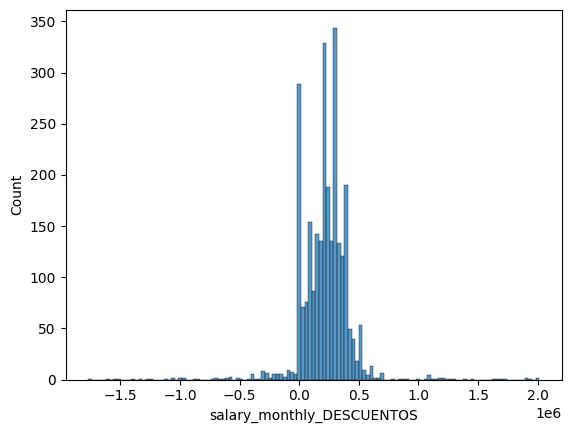

In [30]:
seaborn.histplot(df_limpio['salary_monthly_DESCUENTOS'])

Interpretemos correlación entre las columnas de sueldos

-Calcular las medias (ambas columnas)

-Hacer el grafico que corresponda

In [31]:
matcov=np.cov(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

#df_limpio.salary_monthly_BRUTO.describe().apply(lambda s: '{0:.2f}'.format(s))
#df_limpio.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s))

matriz de varianza covarianza: 
 [[2.87270895e+11 2.24991547e+11]
 [2.24991547e+11 2.17313664e+11]] 

matriz de correlaciones: 
  [[1.         0.90048581]
 [0.90048581 1.        ]] 

correlación entra ambas variables:  0.9004858067106014 

